In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.append("../")
from src.util import debye_spectral_density
from src.util import operators

# 1.) HOPS

In [2]:
from src.util import operators
from src.util.stochastic_expectation_value import compute_stochastic_expectation_value_linear as compute_exp_val_linear
from src.util.stochastic_expectation_value import compute_stochastic_expectation_value_nonlinear as compute_exp_val_nonlinear

In [3]:
sigma_x, sigma_z, eye = operators.generate_physical_operators()
duration = 50

## Linear  vs non-linear HOPS

In [4]:
psis_linear_100 = np.array([np.load("simple_hops_linear_100/data/psi"+str(i)+".npy") for i in range(100)])
psis_linear_1000 = np.array([np.load("simple_hops_linear_1000/data/psi"+str(i)+".npy") for i in range(1000)])
psis_linear_10000 = np.array([np.load("simple_hops_linear_10000/data/psi"+str(i)+".npy") for i in range(10000)])
psis_nonlinear_100 = np.array([np.load("simple_hops_nonlinear_100/data/psi"+str(i)+".npy") for i in range(100)])
psis_nonlinear_1000 = np.array([np.load("simple_hops_nonlinear_1000/data/psi"+str(i)+".npy") for i in range(1000)])
psis_nonlinear_10000 = np.array([np.load("simple_hops_nonlinear_10000/data/psi"+str(i)+".npy") for i in range(10000)])

In [5]:
sigma_zs_linear_100 = compute_exp_val_linear(psis_linear_100, sigma_z)
sigma_zs_linear_1000 = compute_exp_val_linear(psis_linear_1000, sigma_z)
sigma_zs_linear_10000 = compute_exp_val_linear(psis_linear_10000, sigma_z)
sigma_zs_nonlinear_100 = compute_exp_val_nonlinear(psis_nonlinear_100, sigma_z)
sigma_zs_nonlinear_1000 = compute_exp_val_nonlinear(psis_nonlinear_1000, sigma_z)
sigma_zs_nonlinear_10000 = compute_exp_val_nonlinear(psis_nonlinear_10000, sigma_z)

In [6]:
ts = np.linspace(0, 50, 1000)

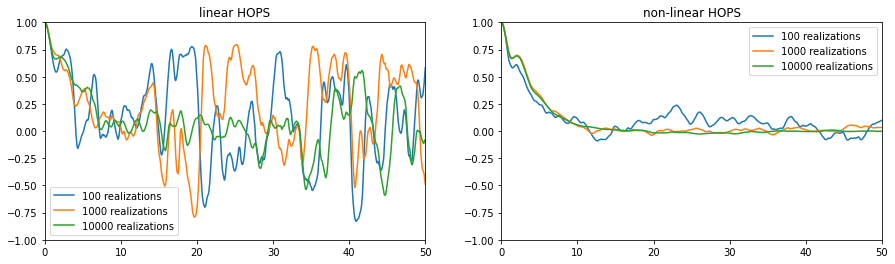

In [7]:
figure, axarray = plt.subplots(1, 2, figsize=(15, 4))
axarray[0].plot(ts, sigma_zs_linear_100, label="100 realizations")
axarray[0].plot(ts, sigma_zs_linear_1000, label="1000 realizations")
axarray[0].plot(ts, sigma_zs_linear_10000, label="10000 realizations")
axarray[0].legend()
axarray[0].set_xlim(0, 50)
axarray[0].set_ylim(-1, 1)
axarray[0].set_title("linear HOPS")
axarray[1].plot(ts, sigma_zs_nonlinear_100, label="100 realizations")
axarray[1].plot(ts, sigma_zs_nonlinear_1000, label="1000 realizations")
axarray[1].plot(ts, sigma_zs_nonlinear_10000, label="10000 realizations")
axarray[1].legend()
axarray[1].set_xlim(0, 50)
axarray[1].set_ylim(-1, 1)
axarray[1].set_title("non-linear HOPS")
plt.show()

In [8]:
ts = np.linspace(0, duration, 1000)
with open("final/simple_hops_linear_multiple_realizations.txt", "w+") as file:
    file.write("t sigma_z_100 sigma_z_1000 sigma_z_10000\n")
    for i, t in enumerate(ts):
        line = str(t)
        line += " " + str(sigma_zs_linear_100[i])
        line += " " + str(sigma_zs_linear_1000[i])
        line += " " + str(sigma_zs_linear_10000[i]) + "\n"
        file.write(line)
        
with open("final/simple_hops_nonlinear_multiple_realizations.txt", "w+") as file:
    file.write("t sigma_z_100 sigma_z_1000 sigma_z_10000\n")
    for i, t in enumerate(ts):
        line = str(t)
        line += " " + str(sigma_zs_nonlinear_100[i])
        line += " " + str(sigma_zs_nonlinear_1000[i])
        line += " " + str(sigma_zs_nonlinear_10000[i]) + "\n"
        file.write(line)

## Magnitudes of the states from linear HOPS

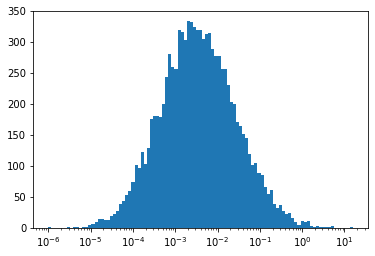

In [16]:
magnitudes = []
for i in range(10000):
    # take the final state of each sample
    magnitudes.append(np.linalg.norm(psis_linear_10000[i, -1, :]))
    
lowest = np.min(magnitudes)
largest = np.max(magnitudes)
bins = np.logspace(np.log10(lowest), np.log10(largest+1), 100)

plt.hist(magnitudes, bins=bins)
plt.xscale("log")
plt.show()

In [17]:
counts = np.zeros(bins.shape, dtype=int)
for magnitude in magnitudes:
    for i, b in enumerate(bins):
        if magnitude <= b:
            counts[i] += 1
            break

In [18]:
print(np.sum(counts))

10000


In [19]:
with open("final/simple_hops_linear_magnitudes.txt", "w+") as file:
    file.write("magnitude count\n")
    for i, count in enumerate(counts):
        file.write(str(bins[i]) + " " + str(count) + "\n")

## Non-linear HOPS: Convergence in N_trunc

In [20]:
N_trunc_list = [2, 4, 8, 16]

In [22]:
psis_100_list = []
sigma_zs_list = []
for i, N_trunc in enumerate(N_trunc_list):
    psis = np.array([np.load("simple_hops_nonlinear_convergence_N_trunc/data/psi_N_trunc_"+str(N_trunc)+"_"+str(i)+".npy") for i in range(10000)])
    psis_100_list.append(psis)
    sigma_zs_list.append(compute_exp_val_nonlinear(psis, sigma_z))

In [8]:
ts = np.linspace(0, 50, 1000)

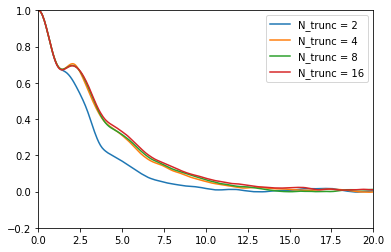

In [32]:
for i, N_trunc in enumerate(N_trunc_list):
    plt.plot(ts[:400], sigma_zs_list[i][:400], label="N_trunc = "+str(N_trunc))
plt.legend()
plt.xlim(0, 20)
plt.ylim(-0.2, 1)
plt.show()

In [33]:
with open("final/simple_hops_nonlinear_N_trunc_convergence.txt", "w+") as file:
    line = "t"
    for N_trunc in N_trunc_list:
        line += " sigma_z_N_trunc_" + str(N_trunc)
    file.write(line + "\n")
    for i, t in enumerate(ts):
        line = str(t)
        for j in range(len(N_trunc_list)):
            line += " " + str(sigma_zs_list[j][i])
        file.write(line + "\n")

# 2.) HOMPS

## High temperature: full runs

In [4]:
psis_100 = np.array([np.load("homps_high_T_100/data/psi"+str(i)+".npy") for i in range(100)])
psis_1000 = np.array([np.load("homps_high_T_1000/data/psi"+str(i)+".npy") for i in range(1000)])
psis_10000 = np.array([np.load("homps_high_T_10000/data/psi"+str(i)+".npy") for i in range(10000)])

In [5]:
sigma_zs_100 = compute_exp_val_nonlinear(psis_100, sigma_z)
sigma_zs_1000 = compute_exp_val_nonlinear(psis_1000, sigma_z)
sigma_zs_10000 = compute_exp_val_nonlinear(psis_10000, sigma_z)

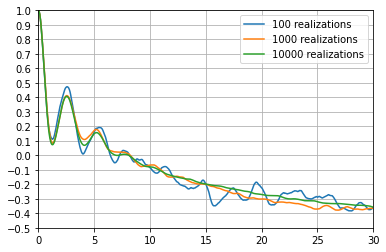

In [6]:
plt.plot(np.linspace(0, 30, 500), sigma_zs_100, label="100 realizations")
plt.plot(np.linspace(0, 30, 500), sigma_zs_1000, label="1000 realizations")
plt.plot(np.linspace(0, 30, 500), sigma_zs_10000, label="10000 realizations")
plt.grid()
plt.yticks(np.linspace(-0.5, 1, 16))
plt.legend()
plt.xlim(0, 30)
plt.ylim(-.5, 1)
plt.show()

In [10]:
with open("final/homps_high_T_multiple_realizations.txt", "w+") as file:
    file.write("t sigma_z_100 sigma_z_1000 sigma_z_10000\n")
    ts = np.linspace(0, 30, 500)
    for i, t in enumerate(ts):
        line = str(t)
        line += " " + str(sigma_zs_100[i])
        line += " " + str(sigma_zs_1000[i])
        line += " " + str(sigma_zs_10000[i]) + "\n"
        file.write(line)